In [2]:
from definitions import ROOT_DIR
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import seaborn as sns

### Load Data from disc 

In [3]:
paths_to_dict= [
    'priors/test_model__uniform.json',
    'priors/test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String250__Endgame__.json',
    'priors/test_model_token__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_Stringsupervised__Endgame__.json'
] 
y_axis_label= {
    'test_model__uniform': 'uniform',
    'test_model__neural_net__data_grammar_8_run_1__Bi_LSTM_Measurement_Encoder__Transformer_Encoder_String250__Endgame__': '250 Bi LSTM',
    'test_model_token__neural_net__data_grammar_8_run_1__DatasetTransformer__Transformer_Encoder_Stringsupervised__Endgame__': 'Supervised NLP' 
}
priors_dict = {}
for path in paths_to_dict:
    with open(ROOT_DIR / path, 'r') as file:
        loaded_data = json.load(file)
        priors_dict[Path(path).stem] = loaded_data

### visualize prediction

/tmp/ipykernel_17037/1188900310.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_17037/1188900310.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_17037/1188900310.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_17037/1188900310.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[row, action].set_xticklabels(['' for label in x_tick_labels])
/tmp/ipykernel_17037/1188900310.py:22: UserWarning: set_tick

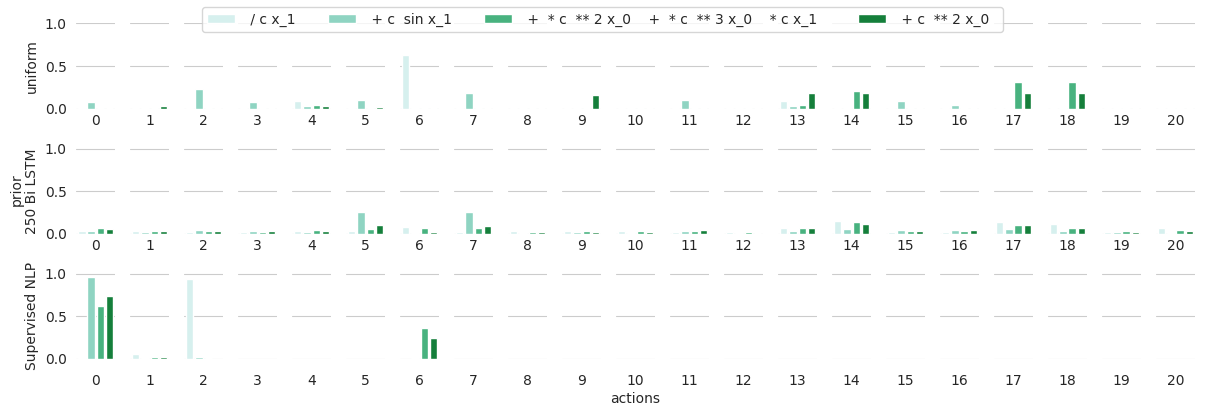

In [4]:
fig, axs = plt.subplots(len(paths_to_dict), 21, figsize=(12, len(paths_to_dict) +1 ), sharey=True, sharex=True)
equations = [
    ' / c x_1 ', 
    ' + c  sin x_1 ',
    ' +  * c  ** 2 x_0    +  * c  ** 3 x_0    * c x_1   ',
    ' + c  ** 2 x_0  ',
    
]
for row, architecture in  enumerate(priors_dict):
    for action in range(21): 
        prior = []
        for equation in equations:
            keys = list(priors_dict[architecture][equation].keys())
            prior.append(priors_dict[architecture][equation][keys[0]][action])
        axs[row,action].bar(x=range(len(equations)),
                            height=prior,
                            color=sns.color_palette("BuGn", len(equations)),
                            label = equations
                            )
        
        x_tick_labels = axs[row, action].get_xticklabels()
        axs[row, action].set_xticklabels(['' for label in x_tick_labels])
        axs[row, action].set_xlabel(action)
        if action == 0:
            axs[row, action].set_ylabel(y_axis_label[architecture])
        axs[row, action].grid(visible=False, axis='x', which='both')
        axs[row, action].spines['top'].set_visible(False)
        axs[row, action].spines['right'].set_visible(False)
        axs[row, action].spines['bottom'].set_visible(False)
        axs[row, action].spines['left'].set_visible(False)
fig.text(0.5, 0, 'actions'  )
fig.text(0, 0.5, 'prior' , rotation=90 )
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)
fig.tight_layout()
plt.show()
        
